<a href="https://colab.research.google.com/github/albin1100/bootcamp-project/blob/main/Explanatory%20study%20on%20the%20role%20of%20neural%20networks%20in%20maintaining%20%20cybersecurity%20in%20iot%20devices%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training anomaly detection model...
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5076/5076 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9996 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 2/15
5076/5076 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 3/15
5076/5076 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 4/15
5076/5076 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 5/15
5076/5076 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 6/15
5076/5076 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 7/15
5076/5076 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 8/15
5076/5076 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 9/15


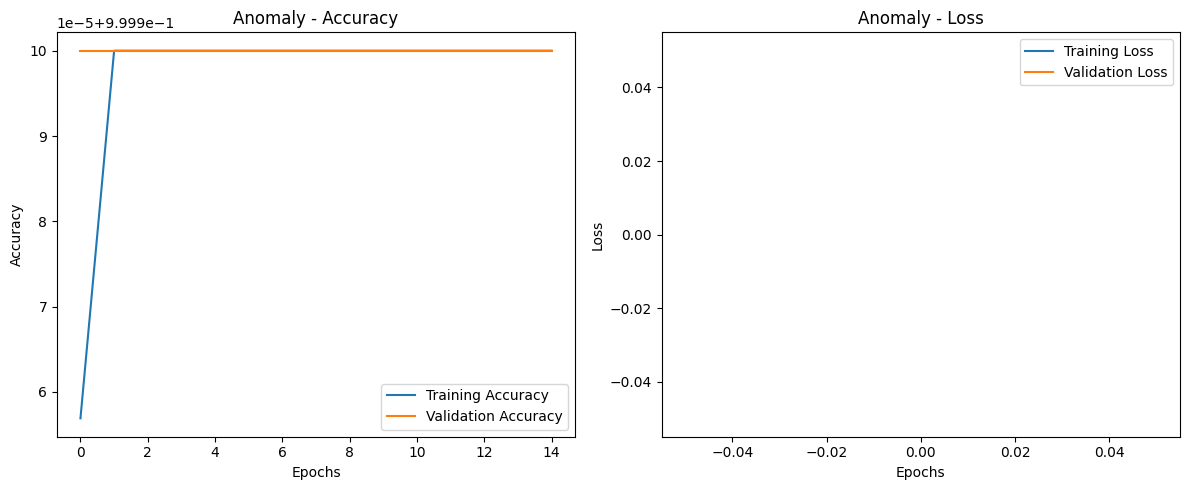

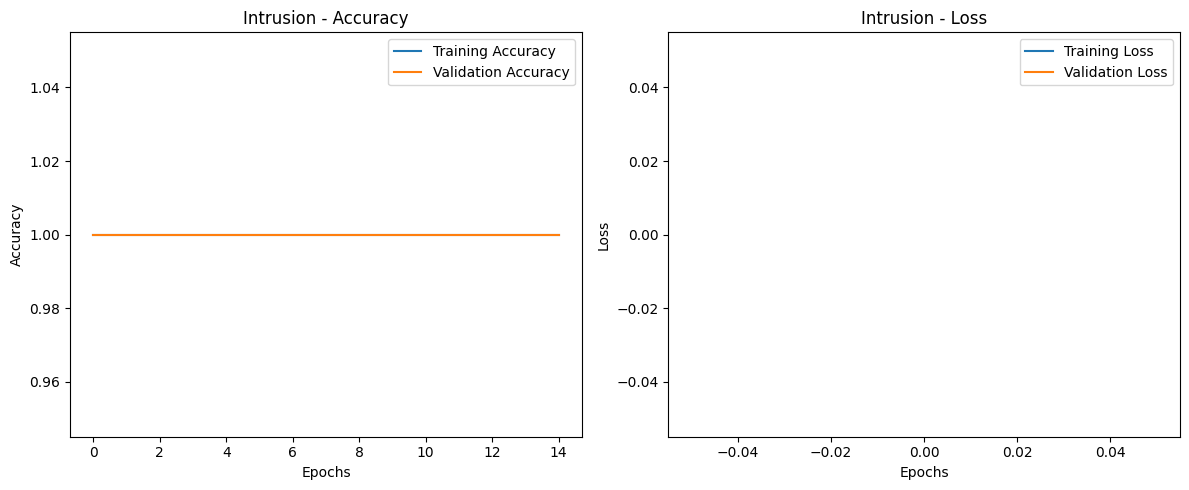

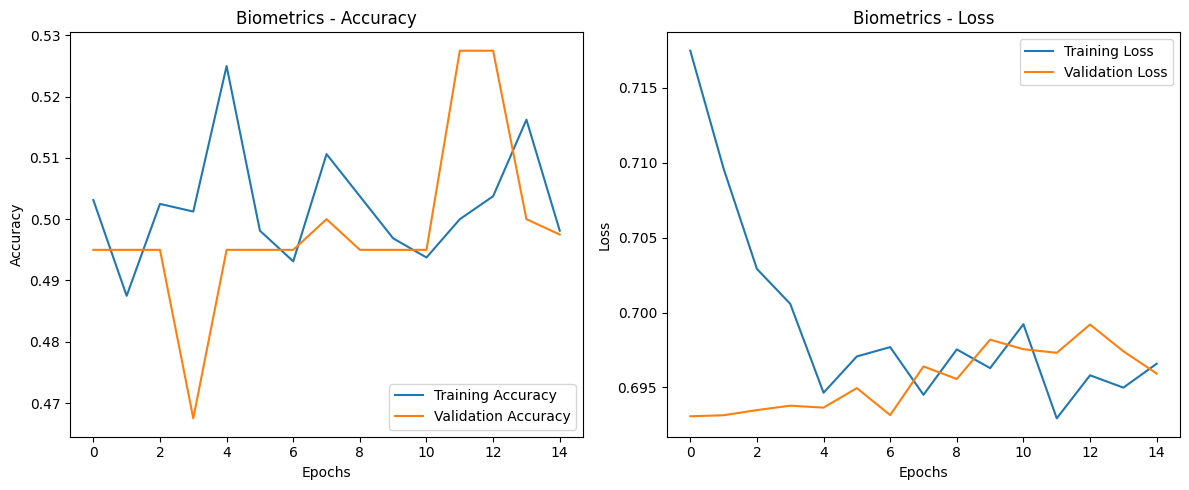

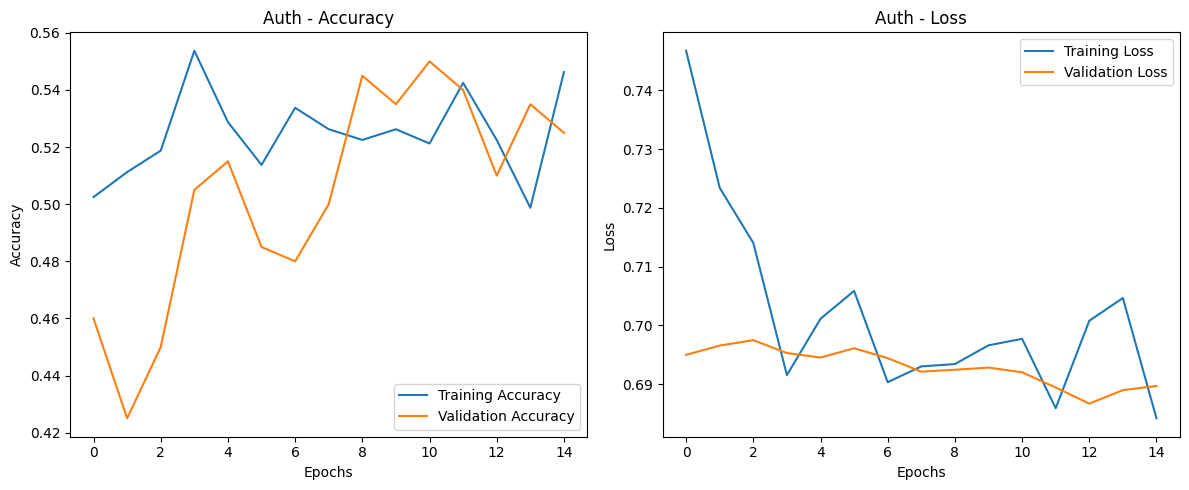

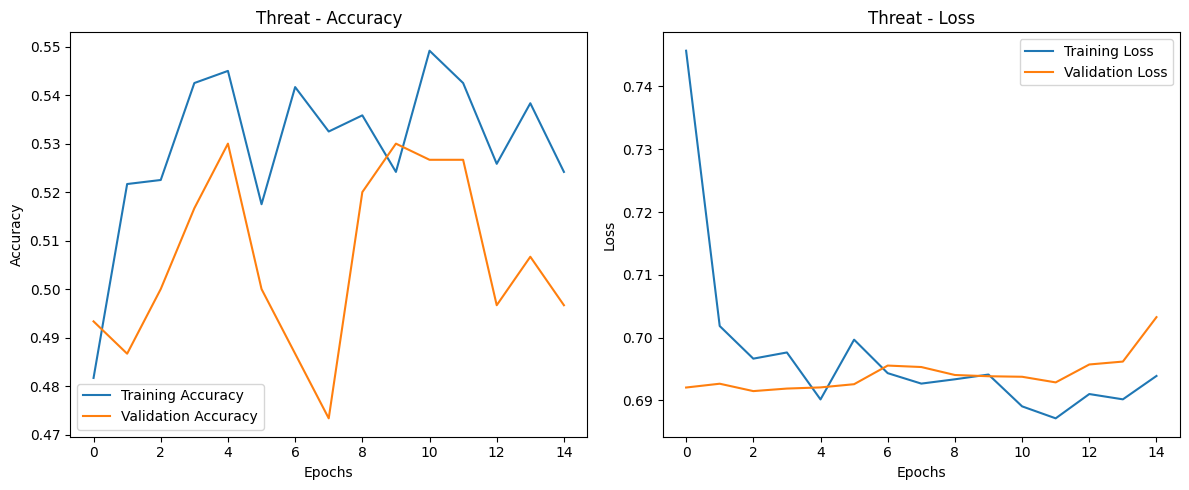

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step

--- Real-Time Detection Results ---
Anomaly - Normal
Intrusion - Normal
Biometrics - Normal
Auth - Suspicious
Threat - Normal


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from faker import Faker
import random

# Step 1: Load IoT dataset for Anomaly and Intrusion Detection
file_path = 'iot23_combined.csv'  # Update with your dataset file path
df = pd.read_csv(file_path)

# Convert labels into binary (Benign -> 0, Malicious -> 1)
def convert_label(value):
    if isinstance(value, str):
        return 1 if value.lower() == 'malicious' else 0
    else:
        return 0

df['label'] = df['label'].apply(convert_label)

# Define features for Anomaly and Intrusion Detection tasks
tasks = {
    'anomaly': {'features': ['duration', 'orig_bytes', 'resp_bytes'], 'target': 'label'},
    'intrusion': {'features': ['orig_pkts', 'resp_pkts', 'conn_state_SF', 'conn_state_S0'], 'target': 'label'}
}

# Step 2: Generate synthetic datasets for additional tasks
fake = Faker()

# User Authentication Synthetic Dataset
num_users = 500
num_samples_user = 2000
auth_methods = ['Password', 'Fingerprint', 'Face Recognition']
locations = ['Home', 'Office', 'Public Network']
user_data = {
    'User_ID': [f'User_{np.random.randint(1, num_users)}' for _ in range(num_samples_user)],
    'Failed_Attempts': np.random.randint(0, 5, size=num_samples_user),
    'Geolocation': [random.choice(locations) for _ in range(num_samples_user)],
    'label': np.random.randint(0, 2, size=num_samples_user)
}
user_auth_df = pd.DataFrame(user_data)

# Device Authentication Synthetic Dataset
num_samples_device = 1000
device_types = ['Camera', 'Thermostat', 'Light', 'Speaker', 'Router']
device_data = {
    'Device_ID': [f'Device_{i}' for i in range(num_samples_device)],
    'Packet_Size': np.random.randint(50, 1500, size=num_samples_device),
    'Inter_Packet_Time': np.random.uniform(0.01, 1.5, size=num_samples_device),
    'Flow_Duration': np.random.uniform(1, 60, size=num_samples_device),
    'Device_Type': [random.choice(device_types) for _ in range(num_samples_device)],
    'label': np.random.randint(0, 2, size=num_samples_device)
}
device_auth_df = pd.DataFrame(device_data)

# Threat Prediction Synthetic Dataset
num_samples_threat = 1500
threat_data = {
    'Feature_A': np.random.uniform(0, 1, size=num_samples_threat),
    'Feature_B': np.random.uniform(0, 1, size=num_samples_threat),
    'Feature_C': np.random.uniform(0, 1, size=num_samples_threat),
    'label': np.random.randint(0, 2, size=num_samples_threat)
}
threat_df = pd.DataFrame(threat_data)

# Define synthetic tasks
synthetic_tasks = {
    'biometrics': {'df': user_auth_df, 'features': ['Failed_Attempts'], 'target': 'label'},
    'auth': {'df': device_auth_df, 'features': ['Packet_Size', 'Inter_Packet_Time', 'Flow_Duration'], 'target': 'label'},
    'threat': {'df': threat_df, 'features': ['Feature_A', 'Feature_B', 'Feature_C'], 'target': 'label'}
}

# Combine all tasks for processing
all_tasks = {**tasks, **synthetic_tasks}

# Step 3: Standardize and split data for training
scalers = {}
data = {}

for task, mapping in all_tasks.items():
    df_task = mapping.get('df', df)  # Use synthetic dataframe if available
    X = df_task[mapping['features']].values
    y = df_task[mapping['target']].values

    # Standardize features
    scalers[task] = StandardScaler()
    X_scaled = scalers[task].fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    data[task] = {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}

# Step 4: Define multiple neural network architectures
def build_ffnn(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_deep_fnn(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 5: Train models and track performance
models = {}
history_records = {}

for task, d in data.items():
    print(f"Training {task} detection model...")
    model = build_ffnn(d['X_train'].shape[1])

    # Train the model
    history = model.fit(d['X_train'], d['y_train'], epochs=15, batch_size=32,
                        validation_data=(d['X_test'], d['y_test']), verbose=1)

    # Save model and training history
    models[task] = model
    history_records[task] = history

# Step 6: Plot accuracy and loss for each task
def plot_history(task, history):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Accuracy
    axs[0].plot(history.history['accuracy'], label='Training Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title(f'{task.capitalize()} - Accuracy')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    # Loss
    axs[1].plot(history.history['loss'], label='Training Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_title(f'{task.capitalize()} - Loss')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

# Display plots for each task
for task, history in history_records.items():
    plot_history(task, history)

# Step 7: Define real-time detection functions
def detect_task(data_point, task):
    data_point = scalers[task].transform([data_point])
    return models[task].predict(data_point)[0][0] > 0.5

# Real-time simulation
real_time_data = {
    'anomaly': [0.005, 100, 200],
    'intrusion': [5, 3, 1, 0],
    'biometrics': [3],
    'auth': [900, 0.5, 15],
    'threat': [0.8, 0.2, 0.6]
}

results = {}
for task, data_point in real_time_data.items():
    results[task] = detect_task(data_point, task)

print("\n--- Real-Time Detection Results ---")
for task, result in results.items():
    print(f"{task.capitalize()} - {'Suspicious' if result else 'Normal'}")


In [ ]:
!pip install faker



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.0 MB/s eta 0:00:00
